In [1]:
# Check the name of the current folder
current_dir = !pwd
print(current_dir)

# List all files in this folder
file_list = !ls
print(file_list)

# List all files in the datasets directory
dataset_list = !ls datasets
print(dataset_list)

# View the first 20 lines of datasets/road-accidents.csv
accidents_head = !head -n 20 datasets/road-accidents.csv
accidents_head

['/Users/Cristina/Desktop/TrafficMortality']
['datasets', 'notebook.ipynb']
['miles-driven.csv', 'road-accidents.csv']


['##### LICENSE #####',
 '# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)',
 '# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)',
 '##### COLUMN ABBREVIATIONS #####',
 '# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)',
 '# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)',
 '# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)',
 '# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)',
 '##### DATA BEGIN #####',
 'state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time',
 'Alabama|18.8|39|30|80',
 'Alaska|18.1|41|25|94',
 'Arizona|18.6|35|28|96',
 'Arkansas|22.4|18|26|95',
 'California|12|35|28|89',
 'Colorado|13.6|37|28|95',

In [3]:
# Import the `pandas` module as "pd"
# ... YOUR CODE FOR TASK 2 ...
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv("datasets/road-accidents.csv", comment="#", sep="|")

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                   51 non-null object
drvr_fatl_col_bmiles    51 non-null float64
perc_fatl_speed         51 non-null int64
perc_fatl_alcohol       51 non-null int64
perc_fatl_1st_time      51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


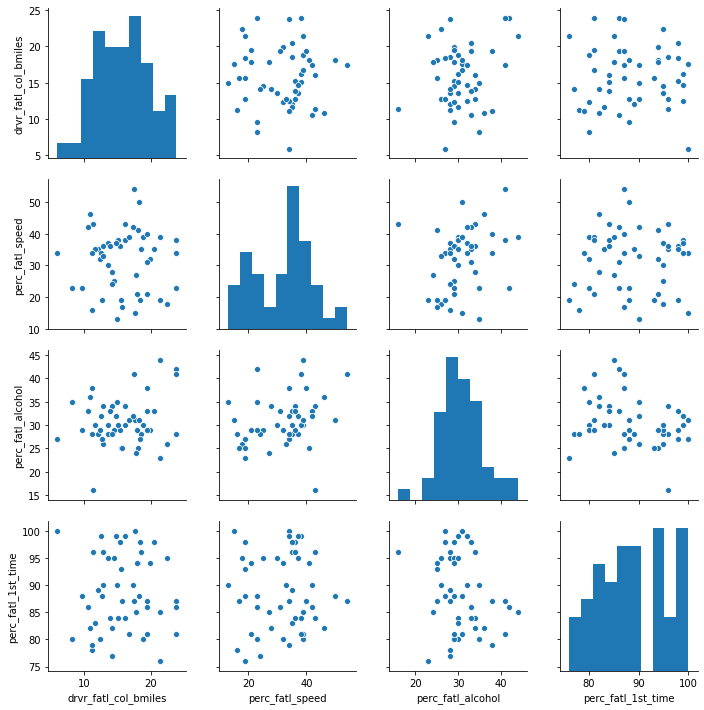

In [4]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
# ... YOUR CODE FOR TASK 3 ...
sns.pairplot(car_acc)

In [5]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [6]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target = car_acc[["drvr_fatl_col_bmiles"]]

# Create a linear regression object
reg = linear_model.LinearRegression().fit(features, target)

# Fit a multivariate linear regression model
# ... YOUR CODE FOR TASK 5 ...

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([[-0.04180041,  0.19086404,  0.02473301]])

The cumulative variance of the first two principal components is 0.7947


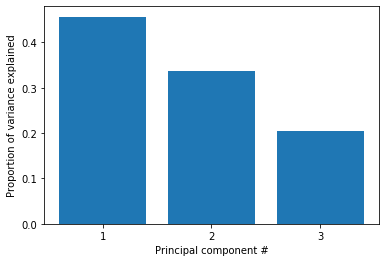

In [7]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
# ... YOUR CODE FOR TASK 6 ...
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
# ... YOUR CODE FOR TASK 6 ...
pca.fit(features_scaled, target)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))